<a href="https://colab.research.google.com/github/JoseGabriel-ITD/MachineLearning/blob/main/Unidad2/SVR_Regresion_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 4: **Máquinas de Soporte para Regresión (SVR)**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

**Máquinas de Soporte para Regresión (SVR)**:

- Es una extensión de las máquinas de soporte vectorial (SVM) para problemas de regresión.

- Intenta ajustar una función que tenga una desviación máxima ε permitida del valor real.

- Es sensible a la escala de los datos, por eso se requiere estandarización.


**Ventajas**:

- Muy eficaz para relaciones no lineales complejas.

- Buena generalización.


**Desventajas**:

- Lento en datasets grandes.

- Requiere cuidadosa selección de hiperparámetros y escalado de datos.


**Comparación**:

| Técnica              | Linealidad | Flexibilidad | Requiere Escalado | Overfitting | Interpretabilidad |
|----------------------|------------|--------------|--------------------|-------------|-------------------|
| Regresión Lineal     | Alta       | Baja         | No                 | Baja        | Alta              |
| Árboles / RandomForest| Baja       | Alta         | No                 | Media-Baja  | Media             |
| SVR                  | Muy Baja   | Alta         | **Sí**             | Baja        | Baja              |


## **1. Cargar datos y librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("autos2.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [2]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Escalamiento de variables**

In [4]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


## **5. Entrenar modelo SVR**

In [5]:
svr_model = SVR(kernel='rbf', C=100, epsilon=0.2)
svr_model.fit(X_train_scaled, y_train_scaled)


SVR(C=100, epsilon=0.2)

## **6. Evaluar el modelo**

In [6]:
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse_svr:.2f}")
print(f"Coeficiente de determinación (R²): {r2_svr:.2f}")


Error cuadrático medio (MSE): 19050289.52
Coeficiente de determinación (R²): 0.84


### **Interpretación**
#### **1. RMSE ≈ 4,365**

* Esto indica que el modelo se equivoca en promedio en unos $4,365 por auto.
* Comparado con el rango de precios (8,000 a 16,000), ese error representa entre 26% y 56%.
* Es significativamente mayor que los errores obtenidos con árbol de decisión y random forest.

#### **2. R² = 0.84**
* El modelo explica el 84% de la variación en los precios, lo cual no es malo, pero es inferior al 92% de los otros modelos.

#### **3. ¿Por qué SVR tiene menor rendimiento?**

* Sensibilidad al escalado: Aunque se usó StandardScaler, puede que la escala de las variables aún no sea ideal para el kernel RBF.
* Hiperparámetros: SVR requiere ajuste cuidadoso de C, epsilon y gamma. Un grid search podría mejorar el rendimiento.
* Datos ruidosos o no lineales: SVR puede tener dificultades si la relación entre variables no es suave o está muy dispersa.
* Dataset pequeño: SVR no es tan eficiente con pocos datos y muchos valores atípicos.
* **Puede mejorar significativamente con ajuste de hiperparámetros (GridSearchCV).**

## **7. Comparar precios reales vs predichos**

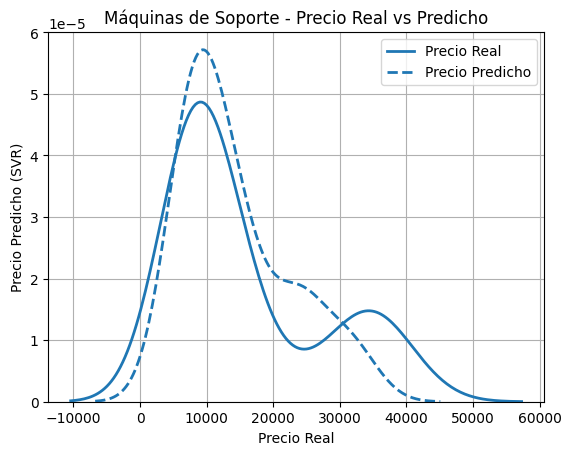

In [12]:
#plt.scatter(y_test, y_pred, color='purple')
sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho (SVR)")
plt.title("Máquinas de Soporte - Precio Real vs Predicho")
plt.grid(True)
plt.legend()
plt.show()
